In [1]:
import matplotlib.pyplot as plt
from jax import numpy as jnp
import numpy as np
from src.data.image import get_image_dataset

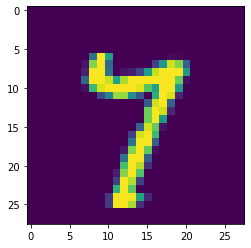

In [2]:
mnist, _, _ = get_image_dataset(
    'MNIST', η_min=None, η_max=None,
)
x = mnist[1][0]
plt.imshow(x)

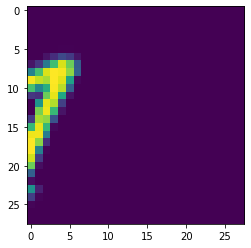

In [3]:
η = jnp.array([1., 0., 0., 0., 0., 0.])
tx_mnist, _, _ = get_image_dataset('MNIST', η_min=η, η_max=η)
x = tx_mnist[1][0]
plt.imshow(x)

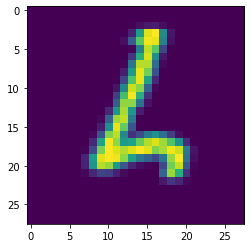

In [4]:
η=jnp.array([0., 0., np.pi, 0., 0., 0.])
rot_mnist, _, _ = get_image_dataset('MNIST', η_min=η, η_max=η)
x = rot_mnist[1][0]
plt.imshow(x)

Files already downloaded and verified
Files already downloaded and verified


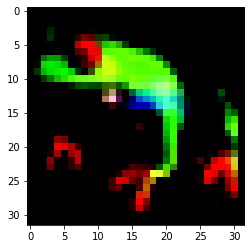

In [5]:
η=jnp.array([0., 0., 0., 0., 0., 0.])
cifar, _, _ = get_image_dataset('CIFAR10', η_min=η, η_max=η)
x = cifar[0][0]
plt.imshow(x)

Files already downloaded and verified
Files already downloaded and verified


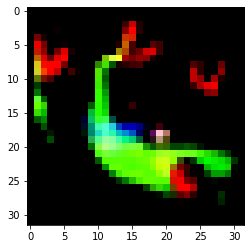

In [6]:
η=jnp.array([0., 0., np.pi, 0., 0., 0.])
rotcifar, _, _ = get_image_dataset('CIFAR10', η_min=η, η_max=η)
x = rotcifar[0][0]
plt.imshow(x)